#  Wine Reviews

1.1数据摘要
在数据集Wine Reviews中，winemag-data_first150k文件中，共有10个属性，
其中标称属性有：country、description、designation、province、region、region_2、variety、winery；
数值属性有：points、price。
对于标称属性，将每个属性的频数按照从大到小排序，因为每个属性中的类别较多，我们在此取标称属性频数较大的前7项作为展示。输出如下所示，每列属性的频数统计输出为一个列表，其中列表的每一项为属性对应的值和该值对应的频数，按照频数从大到小排序。

In [22]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from math import sqrt
from statsmodels.formula.api import ols
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标
# import statsmodels.api as sm
# 读取数据
df = pd.read_csv('C:/Users/ZL/Desktop/winemag-data_first150k.csv')
# 数值属性
label_num = ['points', 'price']
label_nom = ['country', 'description', 'designation',
             'province', 'region_1', 'region_2', 'variety', 'winery']
df_num = df[label_num]#数值属性
df_nom = df[label_nom]#标称属性

# 数据摘要-----------
# 属性可能取值频数
def frequency(label):
    f = df[label].value_counts()
    f = pd.DataFrame(f)
    return f

# 标称属性频数输出
def OutNominal():
    for item in label_nom:
        print("{}可能取值:\n{}".format(item, frequency(item)))
OutNominal()

country可能取值:
                        country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                     

New York Other                147
variety可能取值:
                               variety
Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Barbera                           1365
Pinot Gris                        1365
Cabernet Franc   

对于数值属性，选取数值属性，分别使用.max(),.min(),.mean(),.median(),.quantile()等函数获取属性最大、最小、均值、中位数、四分位数。使用.isnull().sum()函数获取缺失值个数。

In [23]:
#数值属性5数概括
def Num5():
    for item in label_num:
        Minimum = df[item].min()
        Maximum = df[item].max()
        Q1 = df[item].quantile(0.25)
        Median = df[item].mean()
        Q3 = df[item].quantile(0.75)
        print("{}五数概括为：{}，{}，{}，{}，{}".format(item,Minimum,Q1,Median,Q3,Maximum))
#数值属性缺失值个数
def lostdata(nums,item):
     nulltotal = nums[item].isnull().sum()
     print("{}数据缺失值个数为：{}".format(item,nulltotal))
Num5()
for item in label_num :
    lostdata(df,item)

points五数概括为：80，86.0，87.8884184721394，90.0，100
price五数概括为：4.0，16.0，33.13148249353299，40.0，2300.0
points数据缺失值个数为：0
price数据缺失值个数为：13695


数据可视化
   使用盒图和直方图进行数据的可视化。因为属性较多，此处我们以属性points和price为例进行分析。
   对于属性points，盒图和直方图如下所示，可以看到，存在离群点，并且大部分数据分布在80~90之间。

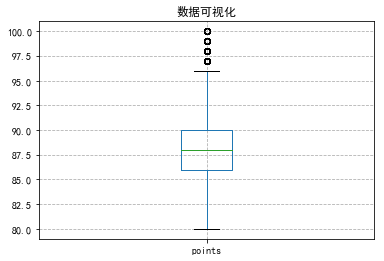

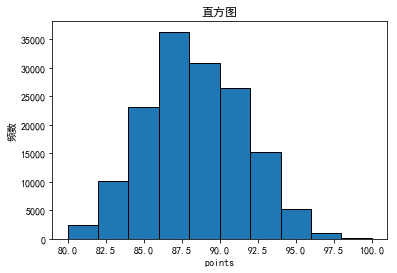

In [14]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

path = 'C:/Users/ZL/Desktop/winemag-data_first150k.csv'
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_data['points'].plot.box(title="数据可视化")
plt.grid(linestyle="--")
plt.show()
plt.hist(x=wine_data['points'], bins=10, edgecolor='black')
plt.xlabel('points')
plt.ylabel('频数')
plt.title('直方图')
plt.show()

   对于属性price，盒图如下所示，可以看到，存在较多离群点；

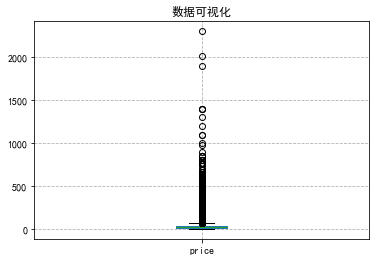

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

path = 'C:/Users/ZL/Desktop/winemag-data_first150k.csv'
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_data['price'].plot.box(title="数据可视化")
plt.grid(linestyle="--")
plt.show()

属性price中存在缺失值，直方图如下所示，列出了price中频数最高的前10项。

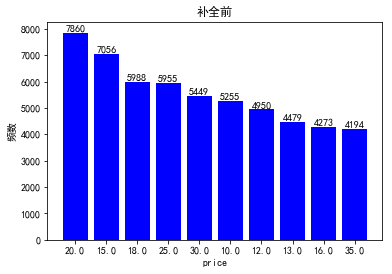

In [12]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
fig, ax = plt.subplots()
num_list = [7860, 7056, 5988, 5955, 5449, 5255, 4950, 4479, 4273, 4194]
name_list = ['20.0', '15.0', '18.0', '25.0', '30.0', '10.0', '12.0', '13.0', '16.0', '35.0']
b = ax.bar(name_list, num_list)
plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
for a, b in zip(name_list, num_list):
    ax.text(a, b + 1, b, ha='center', va='bottom')
plt.title('补全前')
plt.xlabel('price')
plt.ylabel('频数')
plt.show()


#2数据缺失的处理
#2.1剔除缺失值
将存在缺失值的行进行剔除，结果如下所示，剔除后仅剩余39241行，说明有大量的数据行中存在缺失值。
剔除缺失值后，以属性price的频数最大的前10项的直方图为例，可以看到，各个值的频数都有了明显的减少，并且排序也发生了明显变化。

剔除后总数据量：39241


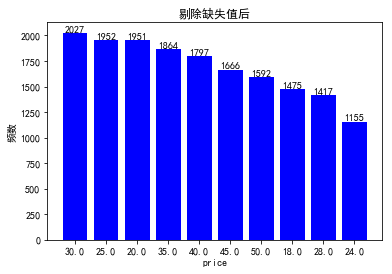

In [37]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/ZL/Desktop/winemag-data_first150k.csv'

def draw(data):
    num = 10
    wine_data = data.values
    counter = Counter(wine_data[:, 4])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('剔除缺失值后')
    plt.xlabel('price')
    plt.ylabel('频数')
    plt.show()
    
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_drop = wine_data.dropna()  # 将缺失值所在行剔除
print('剔除后总数据量：'+str(wine_drop.shape[0]))
draw(wine_drop)

##2.2最高频率值填补
对于存在缺失值的属性，使用该属性中频率最高的值进行填补。
该数据集中共有10个属性，首先确定每个属性的频率最高的值。读取数据集，遍历数据集的每个属性，根据属性的值的频数进行排序，最大频数即为最大频率，在遍历过程中，如果频数最高的值为缺失值，那么取下一个频数最高的值。最终将10个属性的最高频率的值存储在列表中。
接下来将每个属性的缺失值替换为该属性频率最高的值。
补全后以points和price属性为例可以看到，有效行数均为150930行，和数据集中的总行数相同。
以最高频率值填补后，以属性price的频数最大的前10项的直方图为例，可以看到，price为20的频数大量增加，其余值的频数不变。

                   3              4
count  150930.000000  150930.000000
mean       87.888418      31.939966
std         3.222392      34.840211
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      22.000000
75%        90.000000      38.000000
max       100.000000    2300.000000


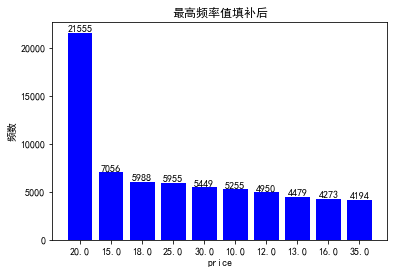

In [18]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/ZL/Desktop/winemag-data_first150k.csv'

def draw(data):
    num = 10
    wine_data = data.values
    counter = Counter(wine_data[:, 4])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('最高频率值填补后')
    plt.xlabel('price')
    plt.ylabel('频数')
    plt.show()
    
wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
wine_data = wine_data.values
max_time = []  # 每个属性最大频数的值
# 确定每个属性最大频数的值
for cl in range(wine_data.shape[1]):
    counter = Counter(wine_data[:, cl])
    counter = counter.most_common()  # 排序，返回类型为list，list的每个元素为内容和频数
    if counter[0][0] == counter[0][0]:  # 如果最大频数不为空值
        max_time.append(counter[0][0])
    else:  # 如果最大频数为空值
        max_time.append(counter[1][0])
# 对每个属性的空值进行替换
wine_max = pd.DataFrame(wine_data)
for cl in range(wine_data.shape[1]):
    wine_max[cl] = wine_max[cl].fillna(max_time[cl])
print(wine_max.describe())
draw(wine_max)

##2.3通过属性的相关关系来填补缺失值
以price属性为例，通过属性的相关关系来填补缺失值，绘制填补后频数最大的前10项的直方图，可以看到，缺失值填补后的值为33.13，并且频数较大。

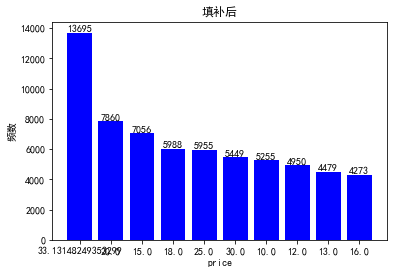

In [46]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/ZL/Desktop/winemag-data_first150k.csv'

def draw(data, cl):
    num = 10
    wine_data = data.values
    counter = Counter(wine_data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('填补后')
    plt.xlabel('price')
    plt.ylabel('频数')
    plt.show()

# 通过属性的相关关系来填补缺失值
def att_rel(path):
    wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
    wine_data = wine_data.values
    im = Imputer(missing_values='NaN', strategy='mean', axis=0)
    att_data = im.fit_transform(wine_data[:, 4].reshape(-1, 1))
    draw(pd.DataFrame(att_data), 0)
    
att_rel(path)

##2.4通过数据对象之间的相似性来填补缺失值
以price属性为例，通过数据对象之间的相似性来填补缺失值，使用IterativeImputer方法实现，绘制填补后频数最大的前10项的直方图，如下所示。

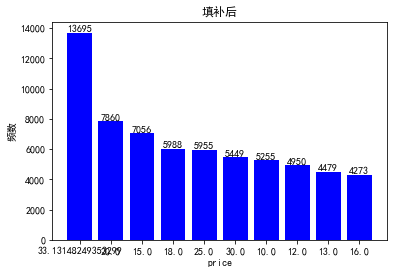

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
path = 'C:/Users/ZL/Desktop/winemag-data_first150k.csv'

def draw(data, cl):
    num = 10
    wine_data = data.values
    counter = Counter(wine_data[:, cl])
    frequency = counter.most_common()  # 取前n项
    num_list = []
    name_list = []
    for i in range(num):
        num_list.append(int(frequency[i][1]))
        name_list.append(str(frequency[i][0]))
    fig, ax = plt.subplots()
    b = ax.bar(name_list, num_list)
    plt.bar(range(len(num_list)), num_list, color='blue', tick_label=name_list)
    for a, b in zip(name_list, num_list):
        ax.text(a, b + 1, b, ha='center', va='bottom')
    plt.title('填补后')
    plt.xlabel('price')
    plt.ylabel('频数')
    plt.show()
# 通过数据对象之间的相似性来填补缺失值
def obj_sim(path):
    wine_data = pd.read_csv(path, header=0, index_col=0, engine='python', encoding='utf-8')
    wine_data = wine_data.values
    # t = BiScaler().fit_transform(wine_data[:, 4].reshape(-1, 1))
    # obj_data = SoftImpute().fit_transform(t)
    obj_data = IterativeImputer().fit_transform(wine_data[:, 4].reshape(-1, 1))
    draw(pd.DataFrame(obj_data), 0)

obj_sim(path)